# Pandas : Soluzioni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<br><br><br>
**Esericizio**: Usare i dataframe *data* e *new_years* definiti nella prossima cella:

In [2]:
Dict = { "costi_fissi":[3000,4500,2500,2000,2000], "entrate":[5000,5000,5000,4000,3000], "costi_totali":[4000,7000,3000,3000,2500] }
index = ["2010y","2011y","2012y","2013y","2014y"]
data = pd.DataFrame(Dict, index = index)
data_copy = data.copy()

New = { "costi_fissi":[2000,2000], "entrate":[2000,2500], "costi_variabili":[500,800] }
new_years = pd.DataFrame(New, index = ["2015y","2016y"])

 e fare le seguenti modifiche:
- **\[\*\]** a *data* aggiungere la colonna "costi_variabili" con valori pari alla differenza tra costi totali e costi fissi
- **\[\*\]** da *data* togliere la colonna costi totali
- **\[\*\]** aggiungere in coda a *data* il dataframe *new_years* (*Suggerimento*: help(pd.concat))
- **\[\*\*\]** estrapolare dal nuovo dataset le entrate e i costi variabili degli anni con ricavi positivi

Tutte le modifiche devono essere fatte direttamente sul dataframe (assicurarsi di iniziare l'elaborazione con la corretta versione di *data*)

In [3]:
data = pd.DataFrame(Dict, index = index)
data["costi_variabili"] = data["costi_totali"] - data["costi_fissi"]
data.drop("costi_totali", axis = 1, inplace = True)
data = pd.concat([data, new_years])
data[:][data.entrate - data.costi_fissi - data.costi_variabili > 0]

,costi_fissi,entrate,costi_variabili
2010y,3000,5000,1000
2012y,2500,5000,500
2013y,2000,4000,1000
2014y,2000,3000,500


<br><br><br>
**Esercizio \[\*\*\]** plottare un grafico a barre che mostri il numero di dati mancanti relativi al codice cabina *Cabin* divisi per *Pclass* <br>
*Suggerimento*: aggiungere a *titanic* una colonna che individui i dati mancanti <br>
**Jackpot! \[\*\*\*\]**: plottare con una sola riga di combinazione di comandi <br>
*Suggerimento*: prova a capire cosa fa 
> titanic.groupby("Pclass").Age.mean().plot(kind="bar") 

In [4]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


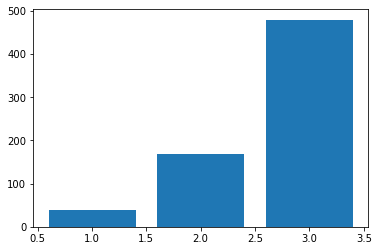

In [5]:
titanic["CabinNull"] = titanic.Cabin.isnull()

titanic_Null = titanic.loc[titanic["CabinNull"] == True, ["Pclass","CabinNull"]]

categories = titanic_Null.groupby("Pclass").CabinNull.count().index.values 
values = titanic_Null.groupby("Pclass").CabinNull.count().values

plt.bar(categories, values)
plt.show()

<AxesSubplot:xlabel='Pclass'>

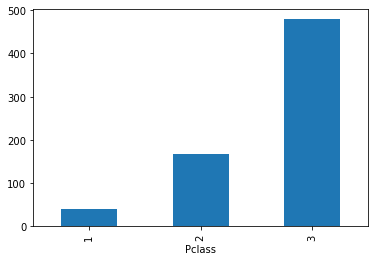

In [6]:
titanic[:][titanic.Cabin.isnull()].groupby("Pclass").count().Name.plot(kind = "bar")

In [7]:
titanic.groupby("Pclass").Pclass.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

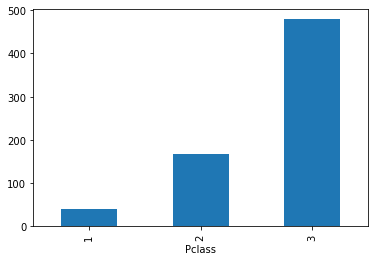

In [11]:
(titanic.groupby("Pclass").Pclass.count()-titanic.groupby("Pclass").Cabin.count()).plot.bar()